# Evaluating model quality

Lino Galiana  
2025-10-06

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/modelisation/1_modelevaluation.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«1_modelevaluation»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/modelisation%201_modelevaluation%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«1_modelevaluation»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/modelisation%201_modelevaluation%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/modelisation/1_modelevaluation.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>
:::: {.content-visible when-profile=“fr”}

> **Compétences à l’issue de ce chapitre**
>
> -   Comprendre que l’objectif du machine learning est d’élaborer des règles de décision efficaces sur des données nouvelles, en favorisant la validité externe plutôt que le simple ajustement aux données d’entraînement ;
> -   Mettre en place une méthodologie pour éviter le sur-apprentissage (overfitting), notamment via la séparation rigoureuse entre ensembles d’entraînement et de validation ;
> -   Connaître les méthodes d’évaluation selon le type d’apprentissage : apprentissage supervisé (classification, régression) et non supervisé ;
> -   Utiliser la validation croisée pour obtenir une évaluation plus robuste et fiable des performances du modèle ;
> -   Prendre en compte les enjeux modernes de l’évaluation, comme le data drift (dérive des données) et la supervision continue des modèles en production ;
> -   Comprendre les nouvelles problématiques liées à l’évaluation des modèles génératifs tels que les grands modèles de langage (LLM).

::::

> **Skills you will acquire in this chapter**
>
> -   Understand that the goal of machine learning is to develop decision rules that generalize well to new data, prioritizing external validity over fitting the training set  
> -   Apply strategies to prevent overfitting, especially by carefully separating training and validation data  
> -   Learn appropriate evaluation methods based on the type of learning task: supervised (classification, regression) or unsupervised  
> -   Use cross-validation to obtain more robust and reliable assessments of model performance  
> -   Consider modern evaluation challenges, including data drift and the need for continuous monitoring of models in production  
> -   Understand emerging issues in evaluating generative models, such as large language models (LLMs)

Machine learning aims to offer predictive methods that are simple to implement from an operational standpoint. This promise naturally appeals to stakeholders with a significant volume of data who wish to use it to predict customer or service user behavior. In the previous chapter, we saw how to structure a problem into training and validation samples (<a href="#fig-ml-pipeline" class="quarto-xref">Figure 1</a>) but without explaining the rationale behind it.

<figure id="fig-ml-pipeline">
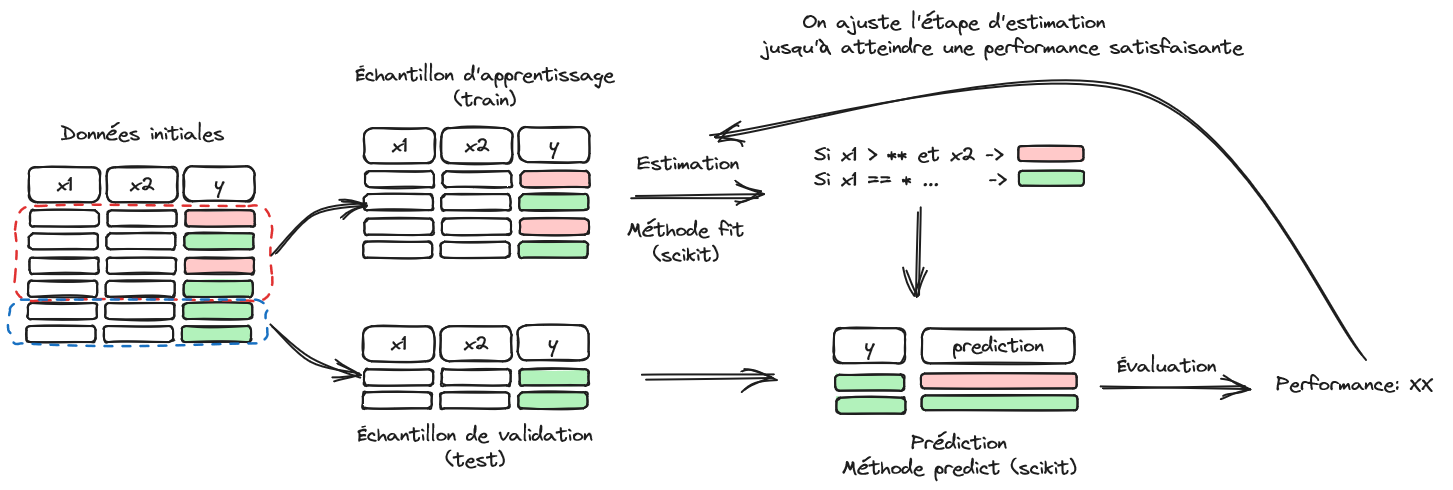
<figcaption>Figure 1: Machine learning methodology illustrated</figcaption>
</figure>

# 1. Methodology to avoid overfitting

Since the goal of machine learning is to implement a model on a target population different from the one it was trained on—for example, a scoring model is not used to change the loans of existing customers but to make decisions for new customers—it makes sense to prioritize the external validity of a model. To ensure that a model’s performance predictions are realistic, it is therefore necessary to evaluate models in a framework similar to the one in which they will later be implemented. In other words, an honest evaluation of a model must be an evaluation of its external validity, that is, its ability to perform well on a population it has not encountered during training.

Why bother with this consideration? Because building a model on a sample and evaluating it on the same sample leads to strong internal validity at the expense of external validity. In other words, if you have control over the exam questions and only those questions, the best strategy is to memorize your material and reproduce it verbatim. Such a test does not assess your understanding of the material, only your ability to memorize it. This is a test of the internal validity of your knowledge. The further the questions deviate from what you have memorized, the more challenging they will become.

The same idea applies to an algorithm: the more its learning adheres to the initial sample, the more its predictive performance—and thus its practical value—will be limited. This is why the quality of a model is evaluated on a sample it has not seen during training: to prioritize external validity over internal validity.

Overfitting occurs when a model has good internal validity but poor external validity, meaning it performs poorly on a sample other than the one it was trained on. Structuring a learning problem into *train*/*test* samples addresses this challenge, as it allows for selecting the best model for extrapolation. This topic may seem trivial, but in practice, many empirical scientific fields do not adopt this methodology when making conclusions beyond the population they studied.

For example, in economics, it is quite common to evaluate a public policy *ceteris paribus* (all other things being equal), deduce a marginal effect, and recommend policy actions based on this. However, it is rare for the subsequent policy to be applied to the same target population or under the same institutional conditions, often leading to different effects. Sampling biases, whether in terms of individual characteristics or the study period, are often overlooked, and the estimation of marginal effects is typically performed without considering external validity.

Returning to the focus of this chapter, formally, this issue stems from the **bias-variance tradeoff** in estimation quality. Let $h(X,\theta)$ be a statistical model. The estimation error can be decomposed into two parts:

$$
\mathbb{E}\bigg[(y - h(\theta,X))^2 \bigg] = \underbrace{ \bigg( y - \mathbb{E}(h_\theta(X)) \bigg)^2}_{\text{biais}^2} + \underbrace{\mathbb{V}\big(h(\theta,X)\big)}_{\text{variance}}
$$

There is thus a trade-off between bias and variance. A non-parsimonious model, meaning one with a large number of parameters, will generally have low bias but high variance. Indeed, the model tends to memorize a combination of parameters from a large number of examples without being able to learn the rule that structures the data.

For example, the green line below is too dependent on the data and is likely to produce a larger error than the black line (which averages more) when applied to new data.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/300px-Overfitting.svg.png)

The division between training and validation samples is an initial response to the challenge of overfitting. However, it is not the only methodological step required to achieve a good predictive model.

In general, it is preferable to adopt parsimonious models, which make as few assumptions as possible about the structure of the data while still delivering satisfactory performance. This is often seen as an illustration of the [Occam’s razor](https://en.wikipedia.org/wiki/Occam's_razor) principle: in the absence of theoretical arguments, the best model is the one that explains the data most effectively with the fewest assumptions. This highly practical approach will guide many methodological choices we will implement.

# 2. How to evaluate a model?

The [introduction to this section](../../content/modelisation/index.qmd) presented the main concepts for navigating the terminology of machine learning. If the concepts of supervised learning, unsupervised learning, classification, regression, etc., are not clear, it is recommended to revisit that chapter. To recap, machine learning is applied in areas where no theoretical models, consensus-driven with all parameters controlled, are available, and instead seeks statistical rules through an inductive approach. Therefore, it is not a scientifically justified approach in all fields. For example, adjusting satellites is better achieved through gravitational equations rather than using a machine learning algorithm, which risks introducing noise unnecessarily.

The main distinction between evaluation methods depends on the nature of the phenomenon being studied (the variable $y$). Depending on whether a direct measure of the variable of interest, a kind of *gold standard*, is available, one may use direct predictive metrics (in supervised learning) or statistical stability metrics (in unsupervised learning).

However, the success of [foundation models](https://en.wikipedia.org/wiki/Foundation_model), i.e., generalist models that can be used for tasks they were not specifically trained on, broadens the question of evaluation. It is not always straightforward to define the precise goal of a generalist model or to evaluate its quality in a universally agreed manner. `ChatGPT` or `Claude` may appear to perform well, but how can we gauge their relevance across different use cases? Beyond the issue of annotations, this raises broader questions about the role of humans in evaluating and controlling decisions made by algorithms.

## 2.1 Supervised Learning

In supervised learning, problems are generally categorized as:

-   Classification: where the variable $y$ is discrete
-   Regression: where the variable $y$ is continuous

The metrics used can be objective in both cases because we have an actual value, a target value serving as a *gold standard*, against which to compare the predicted value.

### 2.1.1 Classification

The simplest case to understand is binary classification. In this case, either we are correct, or we are wrong, with no nuance.

Most performance criteria thus involve exploring the various cells of the **confusion matrix**:

<figure>
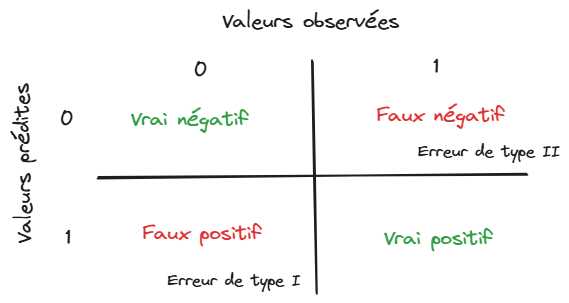
<figcaption aria-hidden="true">Construction of the confusion matrix</figcaption>
</figure>

This matrix compares predicted values with observed values. The binary case is the easiest to grasp; multiclass classification is a generalized version of this principle.

From the 4 quadrants of this matrix, several performance measures exist:

| Criterion | Measure | Calculation |
|------------|--------------------------|----------------------------------|
| *Accuracy* | Correct classification rate | Diagonal of the table: $\frac{TP+TN}{TP+FP+FN+FP}$ |
| *Precision* | True positive rate | Row of positive predictions: $\frac{TP}{TP+FP}$ |
| *Recall* | Ability to identify positive labels | Column of positive predictions: $\frac{TP}{TP+FN}$ |
| *F1 Score* | Synthetic measure (harmonic mean) of precision and recall | $2 \frac{precision \times recall}{precision + recall}$ |

However, some metrics prefer to account for prediction probabilities. If a model makes a prediction with very moderate confidence and we accept it, can we hold it accountable? To address this, we set a probability threshold $c$ above which we predict that a given observation belongs to a certain predicted class:

$$
\mathbb{P}(y_i=1|X_i) > c \Rightarrow \widehat{y}_i = 1 
$$

The higher the value of $c$, the more selective the criterion for class membership becomes.  
Precision, i.e., the rate of true positives among positive predictions, increases. However, the number of missed positives (false negatives) also increases. In other words, being strict reduces recall. For each value of $c$, there corresponds a confusion matrix and thus performance measures. The **ROC curve** is obtained by varying $c$ from 0 to 1 and observing the effect on performance:

![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)

The area under the curve (**AUC**) provides a quantitative evaluation of the best model according to this criterion. The AUC represents the probability that the model can distinguish between the positive and negative classes.

### 2.1.2 Regression

When working with a quantitative variable, the goal is to make a prediction as close as possible to the actual value. Performance indicators in regression therefore measure the discrepancy between the predicted value and the observed value:

| Name | Formula |
|-----------------------------|-------------------------------------------|
| *Mean squared error* | $MSE = \mathbb{E}\left[(y - h_\theta(X))^2\right]$ |
| *Root Mean squared error* | $RMSE = \sqrt{\mathbb{E}\left[(y - h_\theta(X))^2\right]}$ |
| *Mean Absolute Error* | $MAE = \mathbb{E} \bigg[ \lvert y - h_\theta(X) \rvert \bigg]$ |
| *Mean Absolute Percentage Error* | $MAE = \mathbb{E}\left[ \left\lvert \frac{y - h_\theta(X)}{y} \right\rvert \right]$ |

These metrics may be familiar if you are acquainted with the least squares method, or more generally with linear regression. This method specifically aims to find parameters that minimize these metrics within a formal statistical framework.

## 2.2 Unsupervised learning

In this set of methods, there is no *gold standard* to compare predictions against observed values. To measure the performance of an algorithm, one must rely on prediction stability metrics based on statistical criteria. This allows an assessment of whether increasing the complexity of the algorithm fundamentally changes the distribution of predictions.

The metrics used depend on the type of learning implemented. For example, *K-means* clustering typically uses an inertia measure that quantifies the homogeneity of clusters. Good performance corresponds to cases where clusters are homogeneous and distinct from one another. The more clusters there are (the $K$ in $K-means$), the more homogeneous they tend to be. If an inappropriate $K$ is chosen, overfitting may occur: if models are compared solely based on their homogeneity, one might select a very high number of clusters, which is a classic case of overfitting. Methods for selecting the optimal number of clusters, such as the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)), aim to determine the point where the gain in inertia from increasing the number of clusters starts to diminish. The number of clusters that offers the best trade-off between parsimony and performance is then selected.

## 2.3 How are Large Language Models and Generative AI tools evaluated?

While it seems relatively intuitive to evaluate supervised models (for which we have observations serving as ground truth), how can we assess the quality of a tool like `ChatGPT` or `Copilot`? How do we define a good generative AI: is it one that provides accurate information on the first try (truthfulness)? One that demonstrates reasoning capabilities (*chain of thought*) in a discussion? Should we judge style, or only content?

These questions are active areas of research. [Foundation models](https://en.wikipedia.org/wiki/Foundation_model), being very general and trained on different tasks, sometimes in a supervised way, sometimes unsupervised, make it challenging to define a single goal to unambiguously declare one model better than another. The [*MTEB (Massive Text Embedding Benchmark) leaderboard*](https://huggingface.co/blog/lyon-nlp-group/mteb-leaderboard-best-practices), for instance, presents numerous metrics for various tasks, which can be overwhelming to navigate. Moreover, the rapid pace of new model publications frequently reshuffles these rankings.

Overall, although there are metrics where the quality of one text is automatically evaluated by another LLM (*LLM as a judge* metrics), achieving high-quality language models requires human evaluation at multiple levels. Initially, it is helpful to have an annotated dataset (e.g., texts with human-written summaries, image descriptions, etc.) for the training and evaluation phase. This guides the model’s behavior for a given task.

Humans can also provide *ex post* feedback to assess a model’s quality. This feedback can take various forms, such as positive or negative evaluations of responses or more qualitative assessments. While this information may not immediately influence the current version of the model, it can be used later to train a model through reinforcement learning techniques.

## 2.4 Evaluating without looking back: The challenges of model monitoring

It is important to remember that a machine learning model is trained on past data. Its operational use in the next phase of its lifecycle therefore requires making strong assumptions about the stability of incoming data. If the context evolves, a model may no longer deliver satisfactory performance. While in some cases this can quickly be measured using key indicators (sales, number of new clients, etc.), it is still crucial to maintain oversight of the models.

This introduces the concept of **observability** in machine learning. In computing, observability refers to the principle of monitoring, measuring, and understanding the state of an application to ensure it continues to meet user needs. The idea of observability in machine learning is similar: it involves verifying that a model continues to deliver satisfactory performance over time. The main risk in a model’s lifecycle is *data drift*, a change in the data distribution over time that leads to performance degradation in a machine learning model. While building a model with good external validity reduces this risk, it will inevitably have an impact if the data structure changes significantly compared to the training context.

To keep a model relevant over time, it will be necessary to regularly collect new data (the principle of annotations) and adopt a re-training strategy. This opens up the challenges of deployment and MLOps, which are the starting point of a [course taught by Romain Avouac and myself](https://ensae-reproductibilite.github.io/website/).